
---


**MACHINE LEARNING - DECISION TREE**

**SUBMISSION BY - ALAISSA SHAIKH**


---

In [ ]:
#importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

In [ ]:
#importing dataset
data = pd.read_csv('/content/ML_Decision_Tree.csv')

In [ ]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**UNDERSTANDING DATA**

*   **Demographic Information:** Gender, Age.

*   **Body Measurements:** Height, Weight.

*   **Eating Habits:** Frequency of high caloric food consumption, number of main meals, food choices between meals, etc.

*   **Health Behavior:** Physical activity frequency, smoking habits, alcohol consumption.

*   **Other Lifestyle Choices:** Transportation methods, technology use, whether they monitor calorie consumption, family history of obesity, and other similar aspects.

In [ ]:
#initializing label encoder
le = LabelEncoder()
data[data.select_dtypes(include=['object']).columns] = data.select_dtypes(include=['object']).apply(lambda col: le.fit_transform(col))

In [ ]:
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

'NObeyesdad' is the label, and the other columns are the features. The model learns to associate the features with the labels

In [ ]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#initializing the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

NameError: name 'DecisionTreeClassifier' is not defined

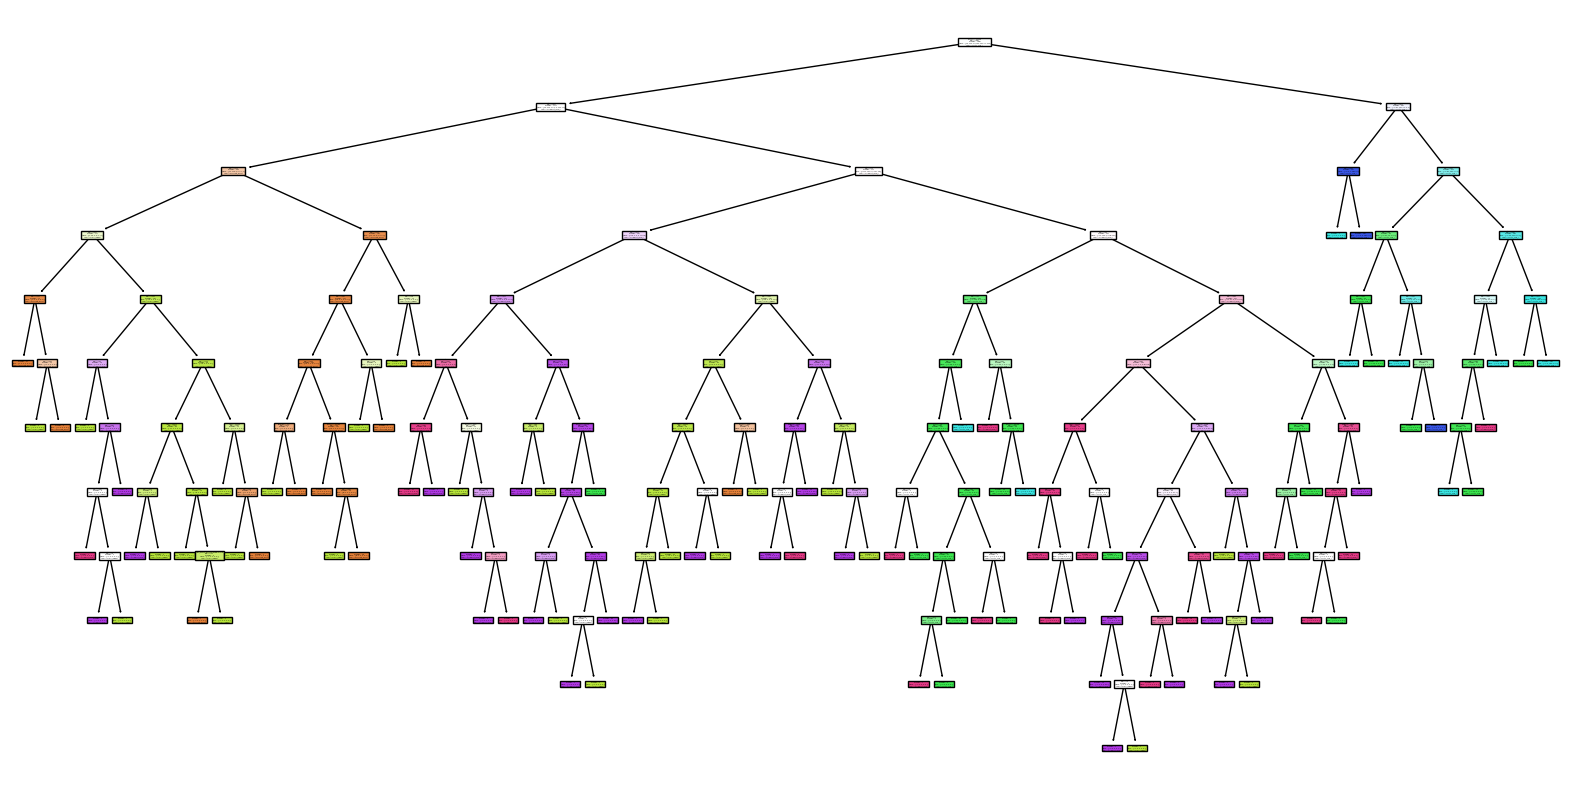

In [ ]:
#plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=le.classes_)
plt.show()

In [ ]:
#evaluating the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.84      0.87      0.86        62
           2       0.96      0.92      0.94        78
           3       0.95      0.95      0.95        58
           4       1.00      1.00      1.00        63
           5       0.91      0.88      0.89        56
           6       0.96      0.96      0.96        50

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423



In [ ]:
#parameter tuning with RandomizedSearchCV
param_dist = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
rsearch = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_dist, n_iter=100, cv=5, random_state=42)
rsearch.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42)

In [ ]:
#getting the best parameters
cls_params = rsearch.best_params_
print("Best parameters from RandomizedSearchCV:", cls_params)

Best parameters from RandomizedSearchCV: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}


In [ ]:
#training the model with the best parameters
clf_best = rsearch.best_estimator_
clf_best.fit(X_train, y_train)
y_pred_best = clf_best.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        56
           1       0.95      0.90      0.93        62
           2       0.97      0.97      0.97        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.93      1.00      0.97        56
           6       1.00      0.94      0.97        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



In [ ]:
#applying post-pruning with GridSearchCV
path = clf_best.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
param_grid = {
    'ccp_alpha': ccp_alphas
}
gsearch = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
gsearch.fit(X_train, y_train)
print("Best ccp_alpha from GridSearchCV:", gsearch.best_params_)

Best ccp_alpha from GridSearchCV: {'ccp_alpha': 0.001632042359101581}


In [ ]:
#final model evaluation
final_clf = gsearch.best_estimator_
final_clf.fit(X_train, y_train)
final_y_pred = final_clf.predict(X_test)
print(classification_report(y_test, final_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        56
           1       0.85      0.84      0.85        62
           2       0.95      0.94      0.94        78
           3       0.96      0.95      0.96        58
           4       1.00      1.00      1.00        63
           5       0.89      0.89      0.89        56
           6       0.96      0.92      0.94        50

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423



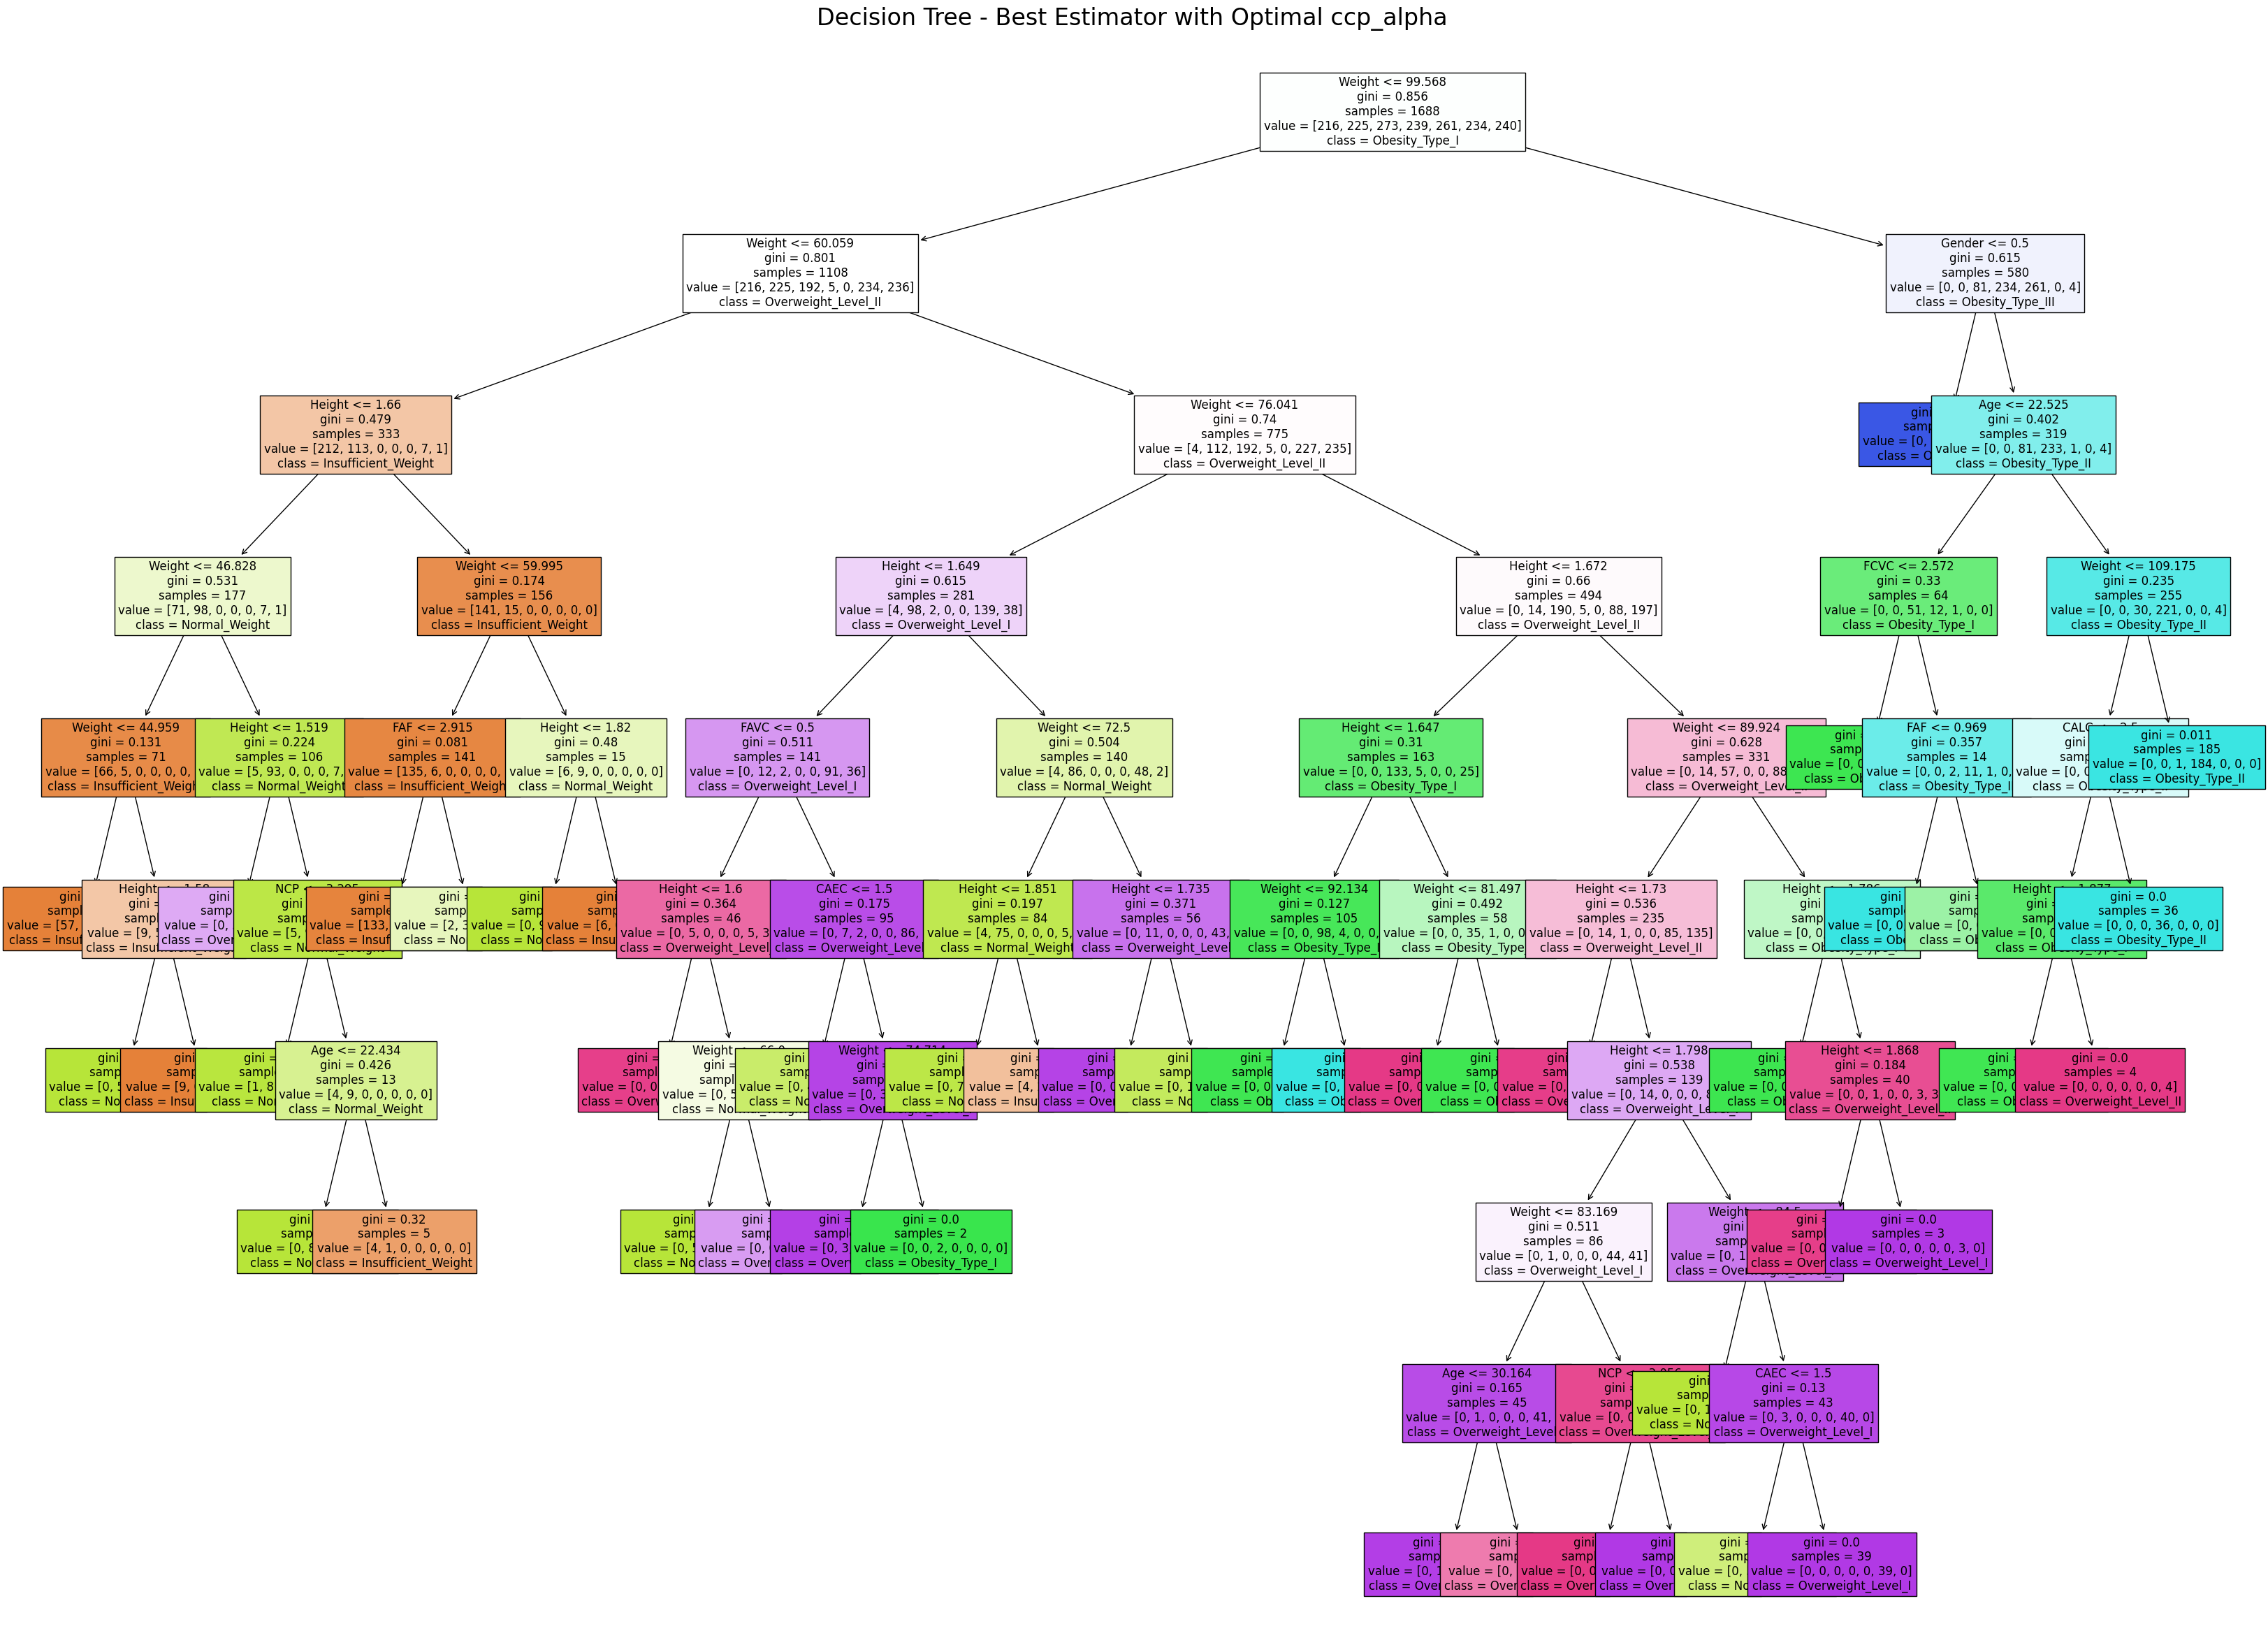

In [ ]:
plt.figure(figsize=(40,30))  # Further increase the figure size
plot_tree(final_clf,
          filled=True,
          feature_names=X.columns,
          class_names=le.classes_,
          fontsize=12)
plt.title('Decision Tree - Best Estimator with Optimal ccp_alpha', fontsize=24)  # Increase title font size
plt.show()

**Components of the Decision Tree**

*   **Root Node**: topmost node of the tree
*   **Internal Nodes**: nodes that further split the data into subgroups
*   **Leaf Nodes**: nodes that do not split further
